## Image classification following Keras example

Ideas come from [here](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html)

## Path and names

In [1]:
train_PATH = '../classification_set/train/'
valid_PATH = '../classification_set/validation/'
name = 'lung_deep'

## Libraries

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

import matplotlib.pyplot as plt

import pickle

import numpy as np

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve, f1_score, auc

Using TensorFlow backend.


## Convolution and pooling layers

In [3]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

## Fully connected layer

In [4]:
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

## Compile the model

In [5]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

## Load dataset

In [6]:
batch_size = 16

In [7]:
# training with augmentation 
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# test only rescale
validation_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(
        train_PATH,  
        target_size=(150, 150),  
        batch_size=batch_size,
        class_mode='binary')  

# validation set is not shuffled
validation_generator = validation_datagen.flow_from_directory(
        valid_PATH,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary',
        shuffle=False)

Found 589 images belonging to 2 classes.
Found 147 images belonging to 2 classes.


In [9]:
train_size = len(train_generator.filenames)
validation_size = len(validation_generator.filenames)

## Fitting the model

In [10]:
model.fit_generator(
        train_generator,
        steps_per_epoch= train_size // batch_size,
        epochs=200,
        validation_data=validation_generator,
        validation_steps= validation_size // batch_size)

Epoch 1/200
36/36 [==============================] - 60s 2s/step - loss: 0.6651 - accuracy: 0.7661 - val_loss: 0.3927 - val_accuracy: 0.7917
Epoch 2/200
36/36 [==============================] - 88s 2s/step - loss: 0.5617 - accuracy: 0.7958 - val_loss: 0.1903 - val_accuracy: 0.7710
Epoch 3/200
36/36 [==============================] - 105s 3s/step - loss: 0.5217 - accuracy: 0.8021 - val_loss: 0.1530 - val_accuracy: 0.7710
Epoch 4/200
36/36 [==============================] - 115s 3s/step - loss: 0.5228 - accuracy: 0.8000 - val_loss: 0.1861 - val_accuracy: 0.7710
Epoch 5/200
36/36 [==============================] - 7302s 203s/step - loss: 0.5365 - accuracy: 0.7941 - val_loss: 0.2667 - val_accuracy: 0.7710
Epoch 6/200
36/36 [==============================] - 7287s 202s/step - loss: 0.5288 - accuracy: 0.7888 - val_loss: 0.1054 - val_accuracy: 0.7710
Epoch 7/200
36/36 [==============================] - 14469s 402s/step - loss: 0.5549 - accuracy: 0.7923 - val_loss: 0.1772 - val_accuracy: 0.771

36/36 [==============================] - 82s 2s/step - loss: 0.4301 - accuracy: 0.8298 - val_loss: 2.0587 - val_accuracy: 0.8015
Epoch 59/200
36/36 [==============================] - 86s 2s/step - loss: 0.4687 - accuracy: 0.8133 - val_loss: 1.1357 - val_accuracy: 0.8855
Epoch 60/200
36/36 [==============================] - 76s 2s/step - loss: 0.4068 - accuracy: 0.8247 - val_loss: 0.3779 - val_accuracy: 0.8855
Epoch 61/200
36/36 [==============================] - 73s 2s/step - loss: 0.4058 - accuracy: 0.8290 - val_loss: 0.3331 - val_accuracy: 0.8194
Epoch 62/200
36/36 [==============================] - 87s 2s/step - loss: 0.4071 - accuracy: 0.8421 - val_loss: 0.0906 - val_accuracy: 0.7939
Epoch 63/200
36/36 [==============================] - 80s 2s/step - loss: 0.4573 - accuracy: 0.8056 - val_loss: 0.2975 - val_accuracy: 0.7939
Epoch 64/200
36/36 [==============================] - 83s 2s/step - loss: 0.4124 - accuracy: 0.8394 - val_loss: 0.1255 - val_accuracy: 0.7863
Epoch 65/200
36/36 

36/36 [==============================] - 207s 6s/step - loss: 0.3843 - accuracy: 0.8386 - val_loss: 0.1223 - val_accuracy: 0.7939
Epoch 116/200
36/36 [==============================] - 202s 6s/step - loss: 0.3714 - accuracy: 0.8490 - val_loss: 0.1570 - val_accuracy: 0.7939
Epoch 117/200
36/36 [==============================] - 176s 5s/step - loss: 0.3904 - accuracy: 0.8333 - val_loss: 0.1739 - val_accuracy: 0.8015
Epoch 118/200
36/36 [==============================] - 105s 3s/step - loss: 0.3780 - accuracy: 0.8499 - val_loss: 1.4843 - val_accuracy: 0.7939
Epoch 119/200
36/36 [==============================] - 71s 2s/step - loss: 0.3835 - accuracy: 0.8290 - val_loss: 3.0755 - val_accuracy: 0.8931
Epoch 120/200
36/36 [==============================] - 75s 2s/step - loss: 0.3705 - accuracy: 0.8455 - val_loss: 0.1222 - val_accuracy: 0.9008
Epoch 121/200
36/36 [==============================] - 76s 2s/step - loss: 0.3766 - accuracy: 0.8377 - val_loss: 0.1477 - val_accuracy: 0.8194
Epoch 122

36/36 [==============================] - 116s 3s/step - loss: 0.3716 - accuracy: 0.8509 - val_loss: 0.1455 - val_accuracy: 0.7939
Epoch 173/200
36/36 [==============================] - 93s 3s/step - loss: 0.3704 - accuracy: 0.8559 - val_loss: 0.3576 - val_accuracy: 0.7863
Epoch 174/200
36/36 [==============================] - 72s 2s/step - loss: 0.4273 - accuracy: 0.8394 - val_loss: 0.1689 - val_accuracy: 0.7863
Epoch 175/200
36/36 [==============================] - 72s 2s/step - loss: 0.3715 - accuracy: 0.8394 - val_loss: 0.3413 - val_accuracy: 0.7634
Epoch 176/200
36/36 [==============================] - 73s 2s/step - loss: 0.3799 - accuracy: 0.8604 - val_loss: 0.1907 - val_accuracy: 0.8092
Epoch 177/200
36/36 [==============================] - 70s 2s/step - loss: 0.3640 - accuracy: 0.8534 - val_loss: 0.3260 - val_accuracy: 0.7863
Epoch 178/200
36/36 [==============================] - 73s 2s/step - loss: 0.3890 - accuracy: 0.8404 - val_loss: 1.6651 - val_accuracy: 0.7786
Epoch 179/20

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)       

## Save the model

In [12]:
#model arch and weigths 
model.save(f'{name}_model.h5') 

#history dictionary
with open(f'{name}_history.dict', 'wb') as file_pi:
        pickle.dump(model.history.history, file_pi)

## Training evaluation

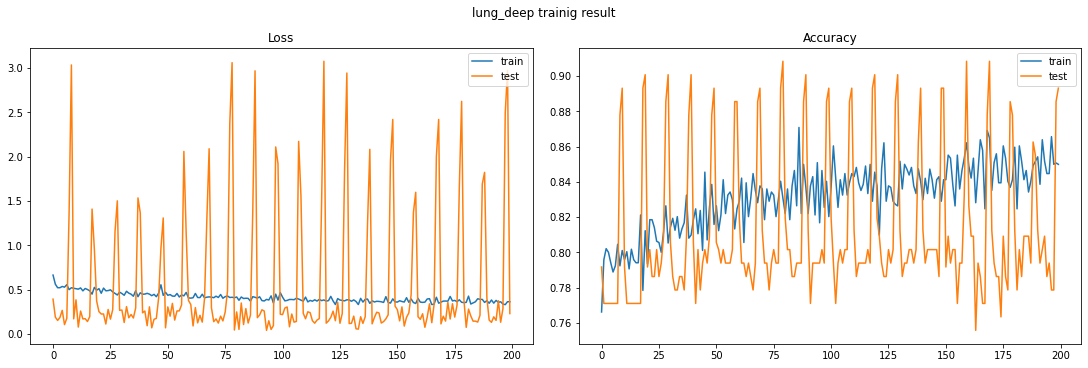

In [13]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(15,5), constrained_layout=True,)

_ = fig.suptitle(f'{name} trainig result')

_ = ax1.set_title('Loss')
_ = ax1.plot(model.history.history['loss'], label='train')
_ = ax1.plot(model.history.history['val_loss'], label='test')
_ = ax1.legend()

_ = ax2.set_title('Accuracy')
_ = ax2.plot(model.history.history['accuracy'], label='train')
_ = ax2.plot(model.history.history['val_accuracy'], label='test')
_ = ax2.legend()

plt.savefig(f'{name}_trainig_result.png')

## Predictions and metrics

In [14]:
def convert_to_binary(y):
    pred_class = []
    pred_prob = []
    
    for i in range(len(y)):
        pred_prob.append(y[i][0])
                   
        if y[i][0]>=0.5:
            pred_class.append(1)
        else:
            pred_class.append(0)
            
    return np.asarray(pred_class), np.asarray(pred_prob)

In [15]:
#real
y_real = validation_generator.classes

#predicted
test_pred_prob = model.predict(validation_generator)
y_pred_class, y_pred_prob = convert_to_binary(test_pred_prob)

In [16]:
y_real

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [17]:
y_pred_class

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [18]:
precision = precision_score(y_real, y_pred_class)
recall = recall_score(y_real, y_pred_class)

fpr_th, tpr_th, _ = roc_curve(y_real, y_pred_prob)
AUC_ROC = auc(fpr_th, tpr_th)

precision_th, recall_th, _ = precision_recall_curve(y_real, y_pred_prob)
PR_AUC = auc(recall_th, precision_th)

In [19]:
print ('Precision =',precision)
print ('Recall =',recall)
print ('Area under ROC curve =',AUC_ROC)
print ('Area under precision-Recall curve =',PR_AUC)

Precision = 0.8201438848920863
Recall = 0.9743589743589743
Area under ROC curve = 0.5977207977207977
Area under precision-Recall curve = 0.8436784826992187


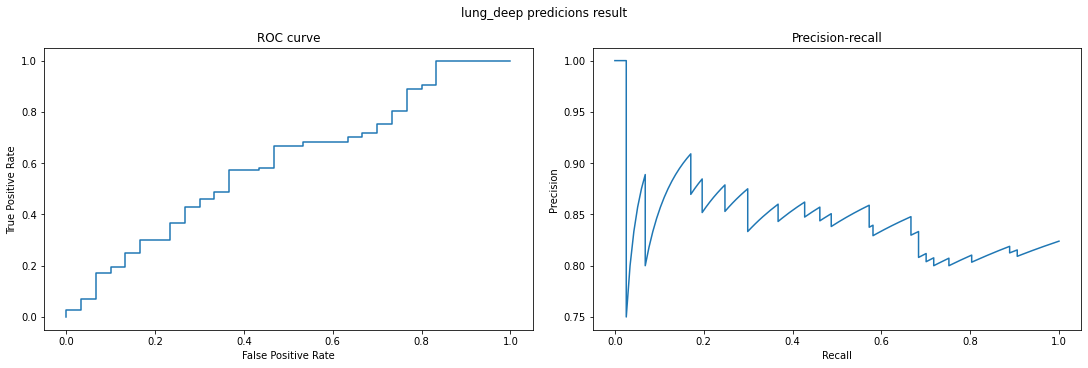

In [20]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(15,5), constrained_layout=True,)

_ = fig.suptitle(f'{name} predicions result')

_ = ax1.set_title('ROC curve')
_ = ax1.plot(fpr_th, tpr_th)
_ = ax1.set_xlabel('False Positive Rate')
_ = ax1.set_ylabel('True Positive Rate')


_ = ax2.set_title('Precision-recall')
_ = ax2.plot(recall_th, precision_th)
_ = ax2.set_xlabel('Recall')
_ = ax2.set_ylabel('Precision')


plt.savefig(f'{name}_predictions_result.png')